In [1]:
import pytorch3d
from pytorch3d import io
import torch
from pytorch3d import renderer
from pytorch3d.renderer import (
    PerspectiveCameras,
    look_at_view_transform,
    MeshRasterizer,
    RasterizationSettings,
    TexturesVertex,
)
import matplotlib.pyplot as plt
import cv2

In [2]:
model_path1="./data/obj_000003.ply"
image_path1="./data/000036.png"

model_info1={
      "cam_R_m2c": [
        -0.1142306923866272,
        0.9454684257507324,
        0.3050234615802765,
        -0.7221558690071106,
        0.13182294368743896,
        -0.6790540218353271,
        -0.6822338104248047,
        -0.29784268140792847,
        0.6677181720733643
      ],
      "cam_t_m2c": [
        20.128000527620316,
        -6.862359587103128,
        811.6523623466492
      ],
      "obj_id": 3
    }

camera_info1={"cam_K": [1066.778, 0.0, 312.9869, 0.0, 1067.487, 241.3109, 0.0, 0.0, 1.0]}


In [3]:
model_path2="./data/obj_000003.ply"
image_path2='./data//000552.png'

model_info2={
      "cam_R_m2c": [
        0.03563910722732544,
        0.7337198257446289,
        0.6785160303115845,
        -0.8753545880317688,
        0.3504917025566101,
        -0.3330315351486206,
        -0.4821665585041046,
        -0.5820719599723816,
        0.6547572612762451
      ],
      "cam_t_m2c": [
        1.3693571090698242,
        11.0243558883667,
        803.2100200653076
      ]
  }

camera_info2={"cam_K": [1066.778, 0.0, 312.9869, 0.0, 1067.487, 241.3109, 0.0, 0.0, 1.0]}

In [4]:
device=torch.device("cuda")

# generate depth

In [7]:
def getcamera(width,height,R,T,K):
    T=T.reshape(3)
    R[0,:]=-R[0,:]
    T[0]=-T[0]
    R[1,:]=-R[1,:]
    T[1]=-T[1]
    R=R.t()
    fx,_,cx,_,fy,cy,_,_,_=K.reshape(9)
    cameras = PerspectiveCameras(
    image_size=[[height, width]],
    R=R[None],
    T=T[None],
    focal_length=torch.tensor([[fx, fy]], dtype=torch.float32),
    principal_point=torch.tensor([[cx, cy]], dtype=torch.float32),
    in_ndc=False,
    device=device
    )
    return cameras
def getdepth(model_path,R,T,K,device=torch.device('cuda')):
    width,height=640,480
    verts,faces=pytorch3d.io.load_ply(model_path)
    mesh = pytorch3d.structures.Meshes( 
        verts=[verts],
        faces=[faces],
        textures=TexturesVertex(verts_features=torch.ones_like(verts)[None]),
    )
    mesh = mesh.to(device)
    
    cameras=getcamera(width,height,R,T,K)
    rasterizer = MeshRasterizer(
    cameras=cameras,
    raster_settings=RasterizationSettings(
        image_size=((height, width)),
    ),
    )
    fragments = rasterizer(meshes_world=mesh)

    return fragments.zbuf[0, :, :, 0],cameras

In [8]:
R1=torch.tensor(model_info1["cam_R_m2c"]).reshape(3,3)
T1=torch.tensor(model_info1["cam_t_m2c"])
K1=torch.tensor(camera_info1["cam_K"])

R2=torch.tensor(model_info2["cam_R_m2c"]).reshape(3,3)
T2=torch.tensor(model_info2["cam_t_m2c"])
K2=torch.tensor(camera_info2["cam_K"])


In [11]:
depth1,camera1=getdepth(model_path1,R1,T1,K1)
depth2,camera2=getdepth(model_path2,R2,T2,K2)

An exception occurred in telemetry logging.Disabling telemetry to prevent further exceptions.
Traceback (most recent call last):
  File "/home/cqk/anaconda3/envs/pytorch3d/lib/python3.10/site-packages/iopath/common/file_io.py", line 946, in __log_tmetry_keys
    handler.log_event()
  File "/home/cqk/anaconda3/envs/pytorch3d/lib/python3.10/site-packages/iopath/common/event_logger.py", line 97, in log_event
    del self._evt
AttributeError: _evt
An exception occurred in telemetry logging.Disabling telemetry to prevent further exceptions.
Traceback (most recent call last):
  File "/home/cqk/anaconda3/envs/pytorch3d/lib/python3.10/site-packages/iopath/common/file_io.py", line 946, in __log_tmetry_keys
    handler.log_event()
  File "/home/cqk/anaconda3/envs/pytorch3d/lib/python3.10/site-packages/iopath/common/event_logger.py", line 97, in log_event
    del self._evt
AttributeError: _evt


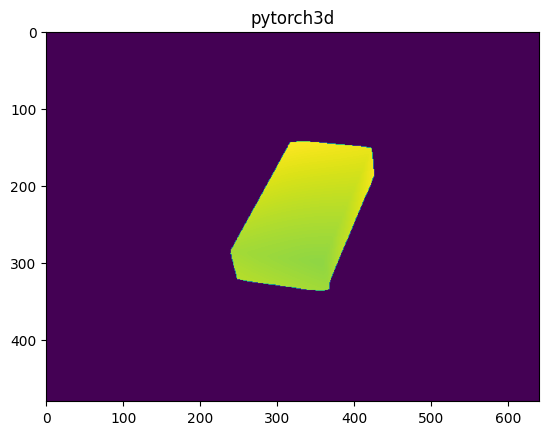

In [12]:
plt.figure()
plt.imshow(depth1.detach().cpu())
plt.title("pytorch3d")
plt.show()

In [13]:
img1_raw = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)

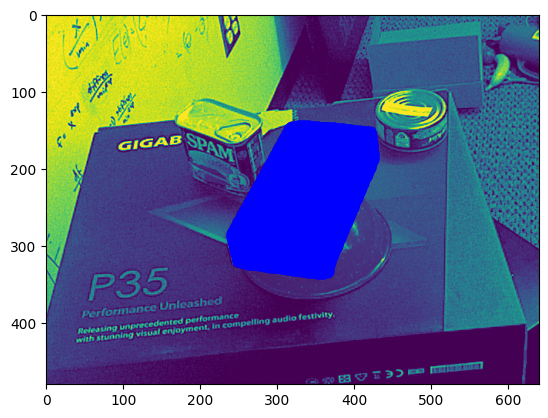

In [15]:
plt.figure()
plt.imshow(img1_raw)
Y,X=torch.where(depth1!=-1)
# 绘制第二组点为蓝色
plt.scatter(X.detach().cpu(),Y.detach().cpu(), color='blue', label='Group 2')
plt.show()


In [18]:
verts,faces=pytorch3d.io.load_ply(model_path1)

An exception occurred in telemetry logging.Disabling telemetry to prevent further exceptions.
Traceback (most recent call last):
  File "/home/cqk/anaconda3/envs/pytorch3d/lib/python3.10/site-packages/iopath/common/file_io.py", line 946, in __log_tmetry_keys
    handler.log_event()
  File "/home/cqk/anaconda3/envs/pytorch3d/lib/python3.10/site-packages/iopath/common/event_logger.py", line 97, in log_event
    del self._evt
AttributeError: _evt


In [19]:
xyz =verts[None].to(device)
xyz_cam=camera1.get_world_to_view_transform().transform_points(xyz)
d = xyz_cam[:, :, 2:]
xy = camera1.transform_points_screen(xyz)[:, :, :2]

In [ ]:
d= xyz_cam[:, :, 2:]

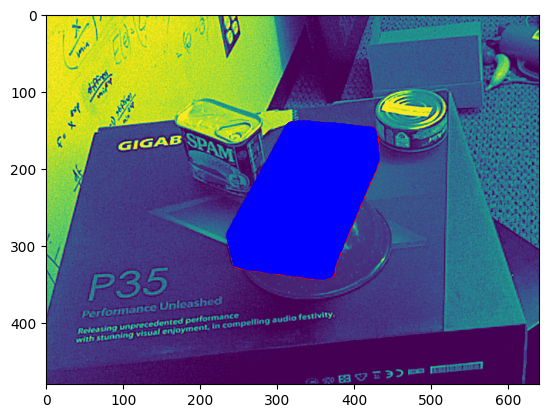

In [23]:
plt.imshow(img1_raw)
# 绘制第一组点为红色
plt.scatter(xy[:,:,0].squeeze().detach().cpu(),xy[:,:,1].squeeze().detach().cpu(), color='red', label='Group 1')

Y,X=torch.where(depth1!=-1)
# 绘制第二组点为蓝色
plt.scatter(X.detach().cpu(),Y.detach().cpu(), color='blue', label='Group 2')
plt.show()

# 3D-2D relationship

In [24]:
from pytorch3d.renderer.cameras import  get_ndc_to_screen_transform
from pytorch3d.transforms import Transform3d

In [36]:
xy2=camera1.transform_points(xyz) 
# xyz->xy2->xy3->xy4 = xyz->xy2->xy44 =xyz->xy
xy3=camera1.get_ndc_camera_transform().transform_points(xy2)
pr_point_fix = torch.zeros(
            (1, 4, 4), device=device, dtype=torch.float32
        )
pr_point_fix[:, 0, 0] = 1.0
pr_point_fix[:, 1, 1] = 1.0
pr_point_fix[:, 2, 2] = 1.0
pr_point_fix[:, 3, 3] = 1.0
pr_point_fix[:, :2, 3] = -2.0 * camera1.get_principal_point()
pr_point_fix_transform = Transform3d(
    matrix=pr_point_fix.transpose(1, 2).contiguous(), device=device
)
xy44=pr_point_fix_transform.transform_points(xy2)
xy44[:,:,:2]=-xy44[:,:,:2]
xy4=get_ndc_to_screen_transform(camera1,with_xyflip=True,image_size=camera1.get_image_size()).transform_points(xy3)

In [38]:
print(torch.allclose(xy4,xy44))
print(torch.allclose(xy,xy4[:,:,:2]))

True
True


In [53]:
-(xy[:,:,:2]-2.0 * camera1.get_principal_point())

tensor([[[380.7437, 171.9962],
         [380.0042, 173.7538],
         [379.2717, 172.8880],
         ...,
         [200.8596, 308.0333],
         [201.1064, 310.8575],
         [201.1770, 312.0205]]], device='cuda:0')

In [62]:
print(torch.allclose(xy2[:,:,:2],-(xy[:,:,:2]-2.0 * camera1.get_principal_point())))

True


In [69]:
xy_depth = torch.cat((-(xy[:,:,:2]-2.0 * camera1.get_principal_point()), d), dim=2)
xyz_unproj_world =camera1.unproject_points(xy_depth,world_coordinates=True)
print(torch.allclose(xyz, xyz_unproj_world))

False


In [85]:
camera1.get_principal_point()

tensor([[312.9869, 241.3109]], device='cuda:0')

In [82]:
print(torch.isclose(xyz, xyz_unproj_world)[:,:10,:])

tensor([[[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True],
         [False,  True,  True],
         [False,  True,  True],
         [False,  True,  True],
         [False,  True,  True],
         [False,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]]], device='cuda:0')


In [84]:
xyz[:,:10,:]

tensor([[[ -5.4870, -45.7210, -86.8715],
         [ -3.1460, -44.6640, -87.0945],
         [ -3.9600, -44.2290, -87.1025],
         [ -2.3910, -43.8290, -87.1125],
         [ -2.3890, -46.0670, -86.3675],
         [  0.1970, -45.1220, -86.9775],
         [ -1.0940, -44.4130, -87.0215],
         [ -0.1110, -42.6420, -87.0835],
         [  3.1100, -46.0660, -86.4595],
         [  3.8370, -44.8600, -86.8005]]], device='cuda:0')

In [83]:
xyz_unproj_world[:,:10,:]

tensor([[[ -5.4870, -45.7210, -86.8716],
         [ -3.1460, -44.6640, -87.0945],
         [ -3.9600, -44.2290, -87.1025],
         [ -2.3909, -43.8290, -87.1126],
         [ -2.3890, -46.0670, -86.3676],
         [  0.1970, -45.1220, -86.9776],
         [ -1.0940, -44.4130, -87.0216],
         [ -0.1110, -42.6420, -87.0836],
         [  3.1100, -46.0660, -86.4596],
         [  3.8370, -44.8600, -86.8005]]], device='cuda:0')